# Datenauswertung

## Importiere Bibliotheken

O:\5-1\5-11\Messungen\2022\06_Nico_MA\05_Datenauswertung\Python\Nanoindentation Datenauswertung\pre_processing.py:127: RuntimeWarning: invalid value encountered in log
  return np.log(alpha)+m*np.log(reversed_piezo-h_f)
O:\5-1\5-11\Messungen\2022\06_Nico_MA\05_Datenauswertung\Python\Nanoindentation Datenauswertung\pre_processing.py:225: RuntimeWarning: invalid value encountered in log
  popt_log, pcov_log = fitting(reversed_piezo, np.log(reversed_MEMS), fit_range, (0.1,1,0), fit_func=func_log)


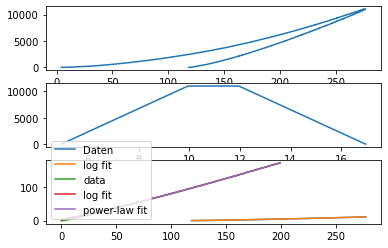

In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from pre_processing import *
from IPython.display import display

# Plotten von simulierten Daten und Fitting
    Fitting Funktion:P=a(h-hf)^m
    


In [7]:
m_slider = widgets.FloatSlider(min=1,max=2, step=0.1)
a_slider = widgets.FloatSlider(value=0.1, min=0.05,max=1, step=0.05)
noise_P_slider = widgets.FloatSlider(value=0.1, min=0,max=10, step=0.05)
fit_range_slider = widgets.FloatRangeSlider(value=[0.3, 0.95], min=0, max=1, step=0.05)
n_points = 100
h_max = 100 #[nm]
h_f = 0
noise_std_h = 0.1
noise_h = np.random.normal(0,noise_std_h, n_points)
h = np.linspace(0, h_max, n_points)#[nm]

def plotfit(m=1.3, alpha=0.1, noise_std_P=0.5, fit_range=[0.3,0.95]):
    noise_P = np.random.normal(0,noise_std_P,n_points)
    P = alpha*(h - h_f)**m+noise_P     #[nN]
    plt.plot(h , P, label='simulated data')
    plt.xlabel('depth [nm]')
    plt.ylabel('Force [nN]')
    popt_log, pcov_log = fitting(h, np.log(P), fit_range, (0.1, 1, 0), fit_func=func_log) 
    popt_exp, pcov_exp = fitting(h, P, fit_range, (0.1,1,0), fit_func=func_exp)
    plt.plot(h, func_exp(h, *popt_log), label = 'log fit')
    plt.plot(h, func_exp(h, *popt_exp), label = 'power law fit')
    plt.legend()
             
    print('Kurvenparameter (alpha, m, hf:)',popt_log)
    print('Abweichung von Modellparametern (log fit):')
    print('\ndelta alpha=', 100*((alpha-popt_log[0])/alpha),'%')
    print('delta m =', 100*((m-popt_log[1])/m),'%')
    print('delta hf =', h_f-popt_log[2],'[nm]')
    print('\nAbweichung von Modellparametern (power law fit):')
    print('\ndelta alpha=', 100*((alpha-popt_exp[0])/alpha),'%')
    print('delta m =', 100*((m-popt_exp[1])/m),'%')
    print('delta hf =', h_f-popt_exp[2],'[nm]')
    
widgets.interact(plotfit, m=m_slider, alpha=a_slider, noise_std_P=noise_P_slider, fit_range=fit_range_slider)

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=1.0), FloatSlider(value=0.1, descri…

<function __main__.plotfit(m=1.3, alpha=0.1, noise_std_P=0.5, fit_range=[0.3, 0.95])>